## Task 2
### Use the Iris dataset to develop a model that can classify irisflowers into different species based on their sepal and petal measurements.

In [32]:
# importing libaraies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# loading dataset
iris_data = pd.read_csv('IRIS.csv')
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [34]:
# display statistical information about dataset
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [35]:
# checking data type and basic information of data type
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [36]:
# to display no.of samples for each class
iris_data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## preprocess the data

In [37]:
# check for the null vulues
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

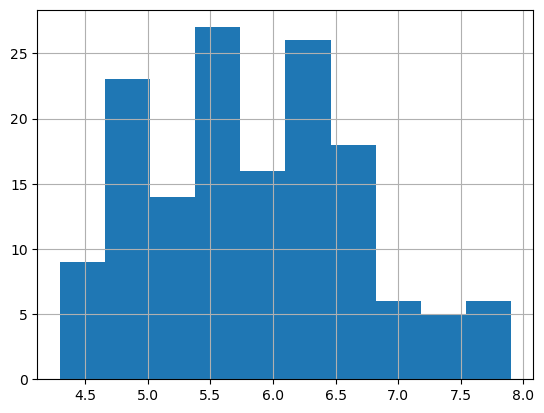

In [38]:
iris_data['sepal_length'].hist()

<Axes: >

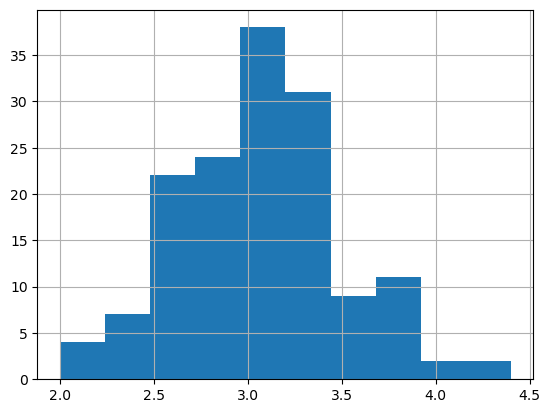

In [39]:
iris_data['sepal_width'].hist()

<Axes: >

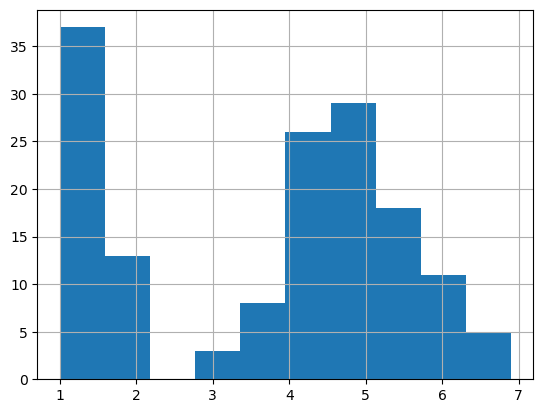

In [40]:
iris_data['petal_length'].hist()

<Axes: >

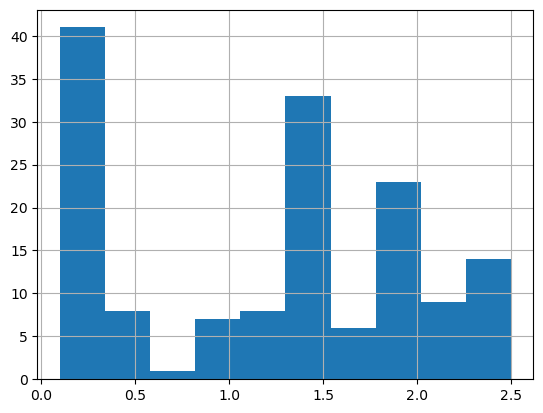

In [41]:
iris_data['petal_width'].hist()

In [42]:
# scatter plot
colours = ['blue', 'green', 'orange']
species =[ 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

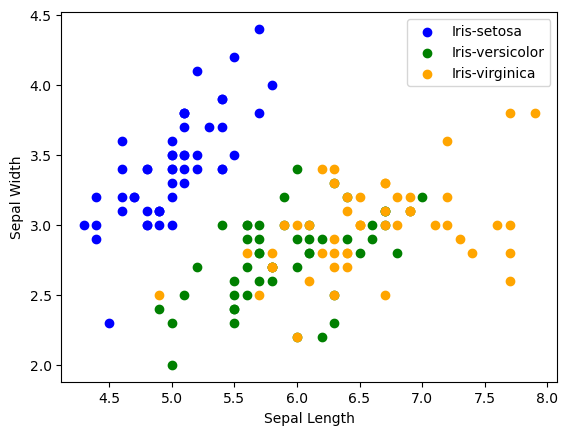

In [43]:
for i in range(3):
    x = iris_data[iris_data['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colours[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

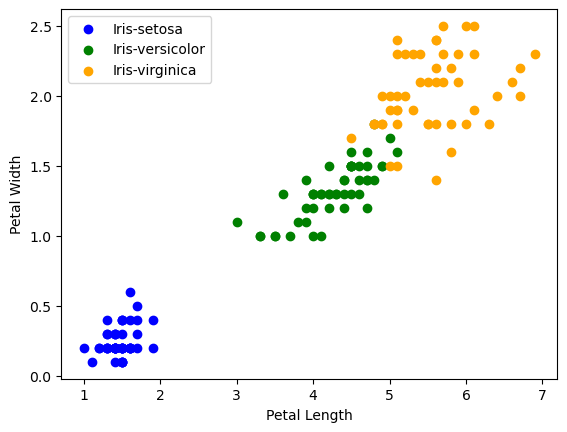

In [44]:
for i in range(3):
    x = iris_data[iris_data['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colours[i], label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

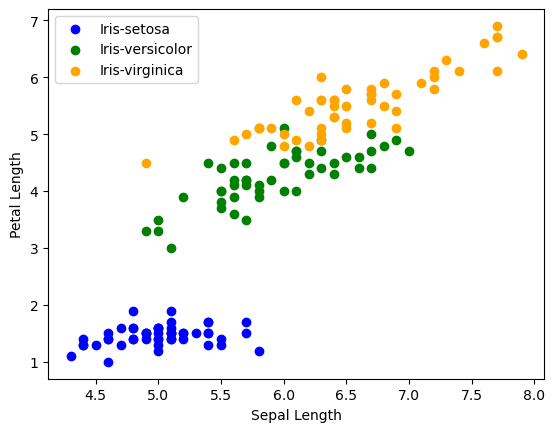

In [45]:
for i in range(3):
    x = iris_data[iris_data['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = colours[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

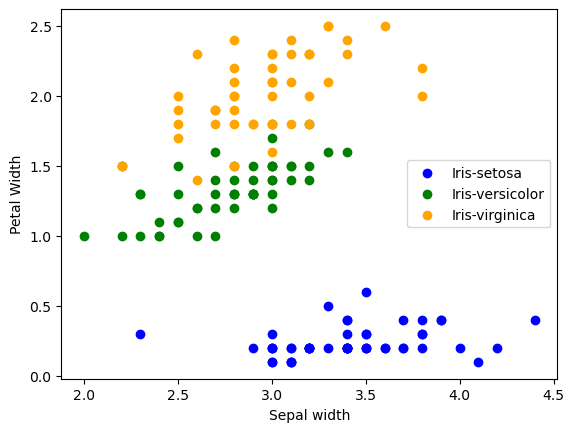

In [46]:
for i in range(3):
    x = iris_data[iris_data['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c = colours[i], label=species[i])
plt.xlabel('Sepal width')
plt.ylabel('Petal Width')
plt.legend()

## label encoding

In [47]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [48]:
iris_data['species'] = label.fit_transform(iris_data['species'])
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Coorelation Matrix

In [49]:
iris_data.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

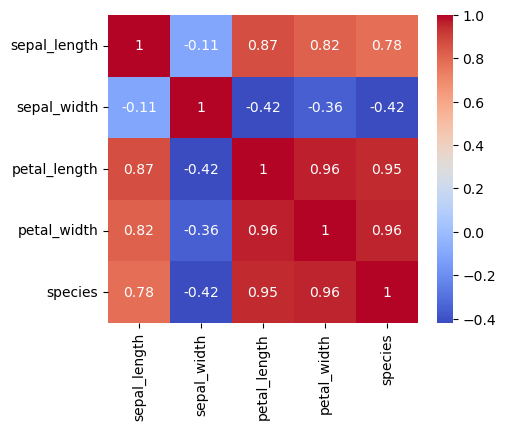

In [50]:
corr = iris_data.corr()
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

## Model Training

In [51]:
from sklearn.model_selection import train_test_split
X = iris_data.drop(columns=['species'])
Y = iris_data['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [52]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [53]:
# model training
model.fit(x_train, y_train)

E:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
print('Accuracy Score:', model.score(x_test, y_test))

Accuracy Score: 0.9333333333333333
